<a href="https://colab.research.google.com/github/Sprt6I/pytorch-Tutorial/blob/main/NEXT_01_pytorch_workflow_RECAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# Create Data

In [5]:
weigth = 0.7
bias = 0.3

start = 0
end = 4
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weigth*X+bias

In [6]:
len(X), len(y)

(200, 200)

In [7]:
split = int(len(X)*0.8)

X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(160, 160, 40, 40)

## Function For Visualisating Data

In [12]:
def graph(title='Train/Test', xLabel='X', yLabel='y', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
  plt.title(title)
  plt.xlabel(xLabel)
  plt.ylabel(yLabel)

  plt.scatter(X_train, y_train, s=4, c='b', label='Train')
  plt.scatter(X_test, y_test, s=4, c='g', label='Test')

  if predictions is not None:
    plt.scatter(X_test, predictions, s=4, c='r', label='Predicions')

  plt.legend()
  plt.show()

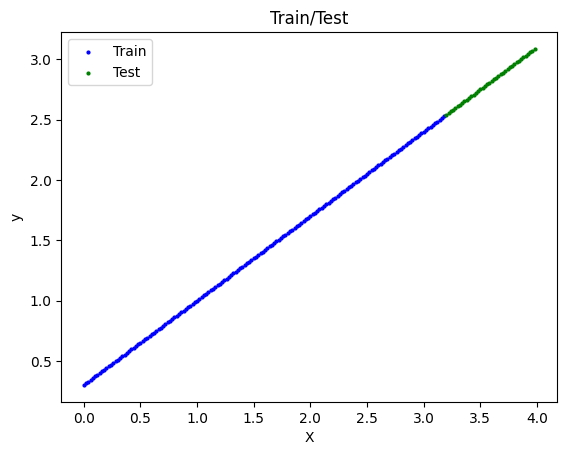

In [13]:
graph()

# Creating Model

In [17]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()

    self.weigth = nn.Parameter(torch.randn(1, dtype=torch.float64), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype=torch.float64), requires_grad=True)

  def forward(self, inp: torch.Tensor) -> torch.Tensor:
    return self.weigth*inp+self.bias

In [39]:
class LinearModelUsingLayers(nn.Module):
  def __init__(self):
    super().__init__()

    self.linearLayer = nn.Linear(in_features=1, out_features=1, dtype=torch.float64)

  def forward(self, inp: torch.Tensor) -> torch.Tensor:
    return self.linearLayer(inp)

In [27]:
torch.manual_seed(42)
model = LinearModel()

In [28]:
model.state_dict()

OrderedDict([('weigth', tensor([0.3367], dtype=torch.float64)),
             ('bias', tensor([0.1288], dtype=torch.float64))])

In [40]:
modelUsingLayers = LinearModelUsingLayers()

## Loss Function And Optimizer

In [29]:
loss_fn = nn.L1Loss()

optim = torch.optim.SGD(params=model.parameters(), lr=0.0001)

# Training Loop

In [33]:
def xxx(epochCount, trainLossArr, testLossArr,model=model, title='Loss Of Model', xlabel='Loss', ylabel='Epoch'):
  plt.title('Loss Of Model')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')

  plt.plot(epochCount, trainLossArr, label='Train')
  plt.plot(epochCount, testLossArr, label='Test')

  plt.legend()
  plt.show()

  print(model.state_dict())

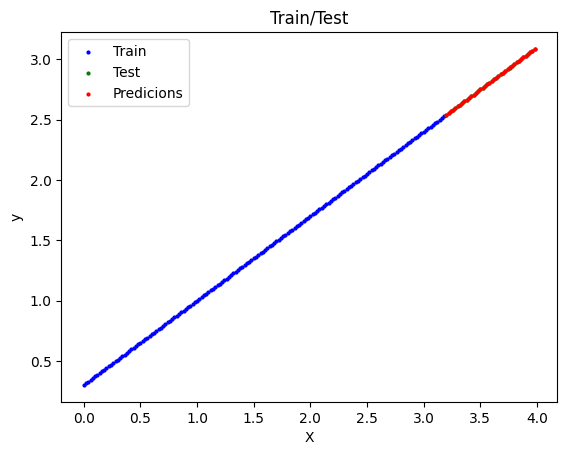

Epoch 0 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


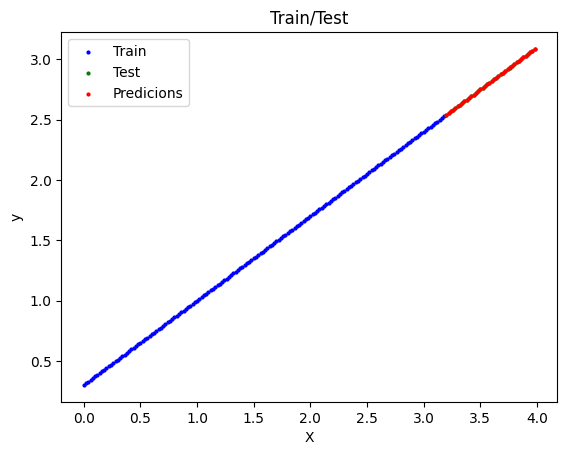

Epoch 500 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


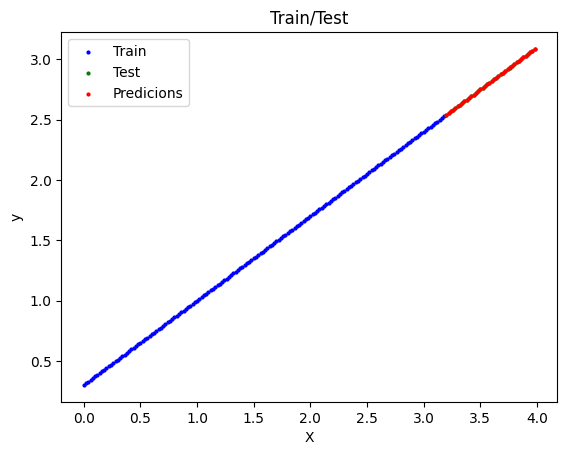

Epoch 1000 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


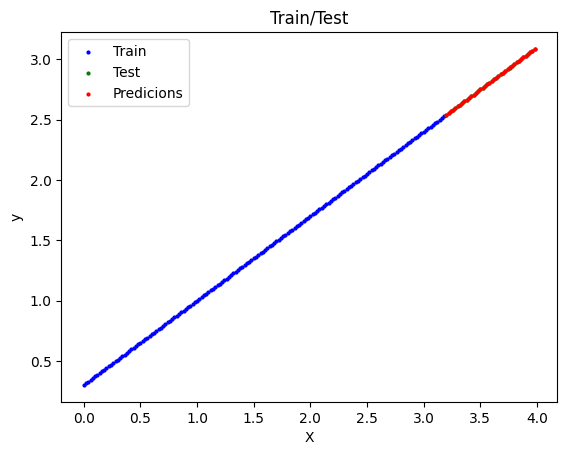

Epoch 1500 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


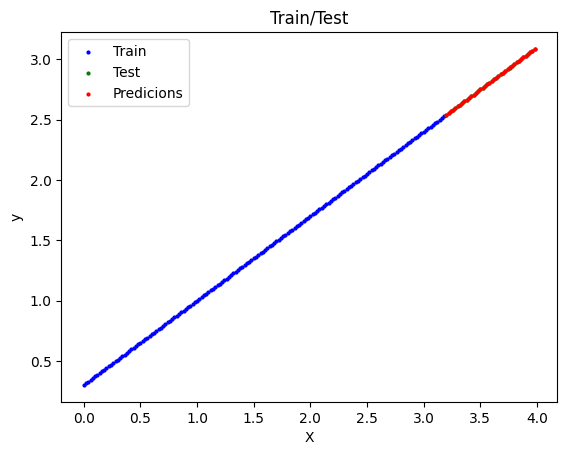

Epoch 2000 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


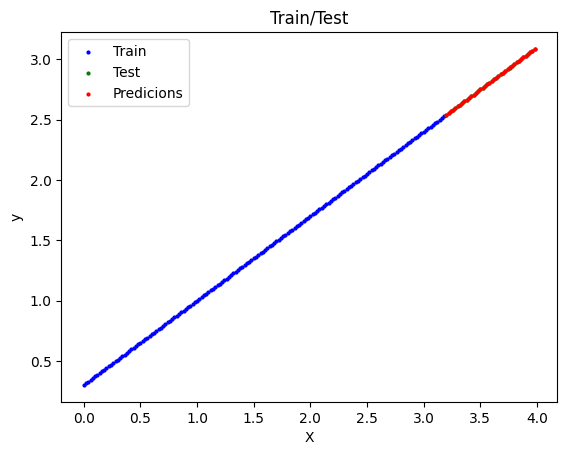

Epoch 2500 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


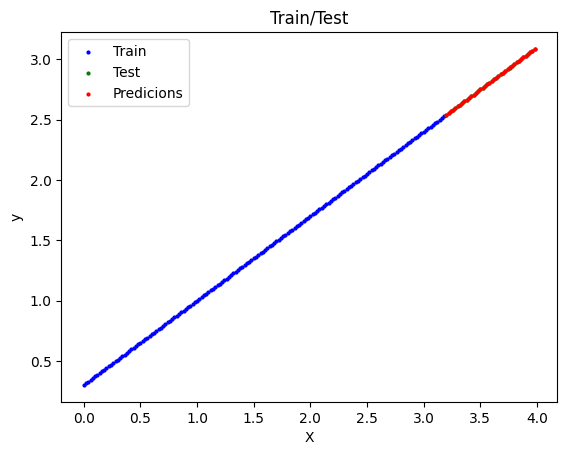

Epoch 3000 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


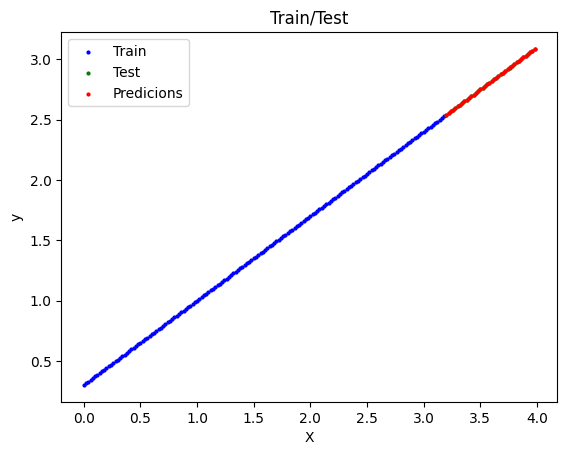

Epoch 3500 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


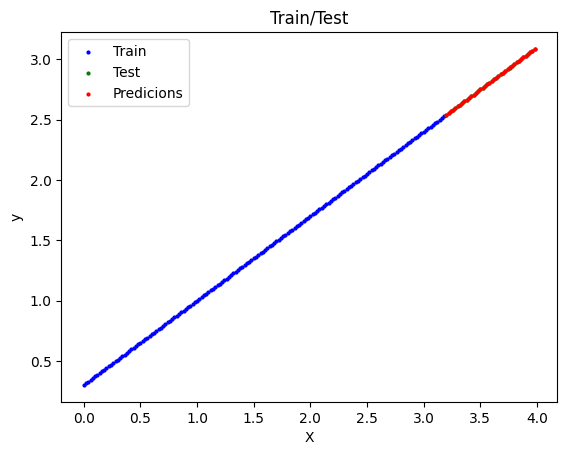

Epoch 4000 | Train Loss: 0.0002592734172591548 | Test Loss: 8.62043154375991e-05


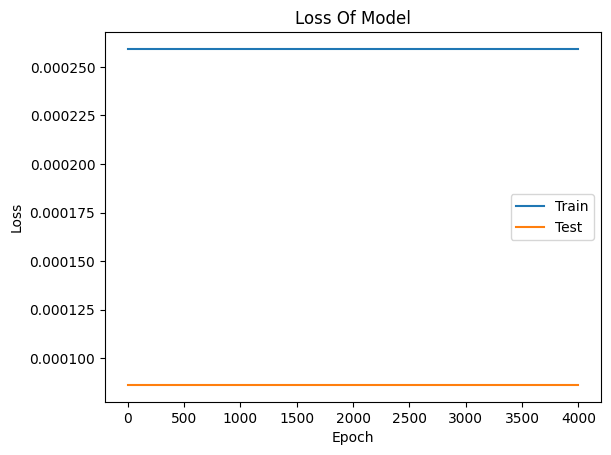

OrderedDict([('weigth', tensor([0.7000], dtype=torch.float64)), ('bias', tensor([0.3001], dtype=torch.float64))])


In [34]:
epochs = 4_001

epochCount = []
trainLossArr = []
testLossArr = []

for epoch in range(epochs):
  train_loss_val = model(X_train)

  train_loss = loss_fn(train_loss_val, y_train)

  optim.zero_grad()

  train_loss.backward()

  optim.step()

  if epoch%500==0:
    model.eval()
    with torch.inference_mode():
      test_loss_val = model(X_test)
      test_loss = loss_fn(test_loss_val, y_test)

    graph(predictions=test_loss_val)

    print(f'Epoch {epoch} | Train Loss: {train_loss} | Test Loss: {test_loss}')

    epochCount.append(epoch)
    trainLossArr.append(train_loss.detach().numpy())
    testLossArr.append(test_loss.detach().numpy())

    model.train()

xxx(epochCount, trainLossArr, testLossArr)

#Save/Load Model

### Save

In [35]:
from pathlib import Path

modelsPath = Path('models')
modelsPath.mkdir(parents=True, exist_ok=True)

modelName = 'model_state_dict.pth'

modelSavePath = modelsPath / modelName

In [36]:
torch.save(obj=model.state_dict(), f=modelSavePath)

In [38]:
model.state_dict()

OrderedDict([('weigth', tensor([0.7000], dtype=torch.float64)),
             ('bias', tensor([0.3001], dtype=torch.float64))])

### Load

In [37]:
model1 = LinearModel()

model1.load_state_dict(torch.load(modelSavePath))
model1.state_dict()

OrderedDict([('weigth', tensor([0.7000], dtype=torch.float64)),
             ('bias', tensor([0.3001], dtype=torch.float64))])